# Matrix operations for matrices, for which each entry is a function $f_{i,j} : \mathbb{R} \to \mathbb{R}$
## Implementation of an (point-wise) addition and multiplication of such matrices 


#### Some imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec


The Code part:

In [2]:
def add_functions(f, g):
    return lambda x: f(x) + g(x)
def multiply_functions(f, g):
    return lambda x: f(x) * g(x)

def validate_function(in_1: np.ndarray,in_2:np.ndarray, op) -> np.ndarray or None:
    try:
        assert in_1.shape == in_2.shape
        return in_1, in_2
    except AssertionError:
        print(f'The shapes of the two matrices you want to operate on, must be equivalent,',
        'which they are not.')
        ans = input('Would you like to use padding to solve this problem? Then please answer with <Yes>: ')
        if ans == 'Yes' or ans == '<Yes>':
            if op == add_functions:
                fill_func = np.array([lambda x: x*0])
            elif op == multiply_functions:
                fill_func = np.array([lambda x: x**0])
            if in_1.shape[0] <= in_2.shape[0] and in_1.shape[1] <= in_2.shape[1]:
                matrix = fill_func.repeat(in_2.size).reshape(in_2.shape)
                matrix[0:len(in_1), 0:len(in_1[0])] = in_1
                in_1 = matrix
            elif in_1.shape[0] >= in_2.shape[0] and in_1.shape[1] <= in_2.shape[1]:
                matrix = fill_func.repeat(in_1.shape[0]*in_2.shape[1]).reshape((in_1.shape[0], in_2.shape[1]))
                matrix[0:len(in_1), 0:len(in_1[0])] = in_1
                in_1 = matrix
                matrix = fill_func.repeat(in_1.shape[0]*in_2.shape[1]).reshape((in_1.shape[0], in_2.shape[1]))
                matrix[0:len(in_2), 0:len(in_2[0])] = in_2
                in_2 = matrix
            elif in_1.shape[0] >= in_2.shape[0] and in_1.shape[1] >= in_2.shape[1]:
                matrix = fill_func.repeat(in_1.size).reshape(in_1.shape)
                matrix[0:len(in_2), 0:len(in_2[0])] = in_2
                in_2 = matrix
            elif in_1.shape[0] <= in_2.shape[0] and in_1.shape[1] >= in_2.shape[1]:
                matrix = fill_func.repeat(in_2.shape[0]*in_1.shape[1]).reshape((in_2.shape[0], in_1.shape[1]))
                matrix[0:len(in_1), 0:len(in_1[0])] = in_1
                in_1 = matrix
                matrix = fill_func.repeat(in_2.shape[0]*in_1.shape[1]).reshape((in_2.shape[0], in_1.shape[1]))
                matrix[0:len(in_2), 0:len(in_2[0])] = in_2
                in_2 = matrix
            return in_1, in_2
        else:
            raise ValueError('Due to incompatibility problems the operation of these two matrices',
                    'is not defined and will therefore be stopped.')

def point_wise_operation(in_1: np.ndarray,in_2:np.ndarray, op) -> np.ndarray:
    
    """This function takes 3 input arguments: two matrices which have entries that are functions and one operator.
        It returns a matrix of the point wise implementation of the operator on the 2 matrices that were given as the input arguments."""

    dimension_check = validate_function(in_1, in_2, op)
    in_1, in_2 = dimension_check
    output = np.ndarray(shape=(len(in_1), len(in_2[0])), dtype=object)
    for i in range(len(in_1)):
        for j in range(len(in_2[0])):
            output[i][j] = op(in_1[i][j], in_2[i][j])
    return output
    

# Matrix plot function

def plot_matrix(matrix: np.ndarray, x_values: np.ndarray, title: str):
    """This function takes a matrix of unary functions and a numpy array of x values,
    and plots the functions' values on these x values.
    """
    n_rows, n_cols = matrix.shape

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
    axs = axs.flatten()  # Flatten the array of axes, for easier iteration

    for i in range(n_rows):
        for j in range(n_cols):
            y_values = np.vectorize(matrix[i, j])(x_values)
            ax = axs[i * n_cols + j]
            ax.plot(x_values, y_values)
            ax.set_title(f"Function at ({i}, {j})")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

x_values = np.linspace(-10, 10, 400)



Test Part for matrices with the same dimensions:

[[<function add_functions.<locals>.<lambda> at 0x7f2b2a324160>
  <function add_functions.<locals>.<lambda> at 0x7f2b2a3241f0>]
 [<function add_functions.<locals>.<lambda> at 0x7f2b2a324280>
  <function add_functions.<locals>.<lambda> at 0x7f2b2a324310>]]


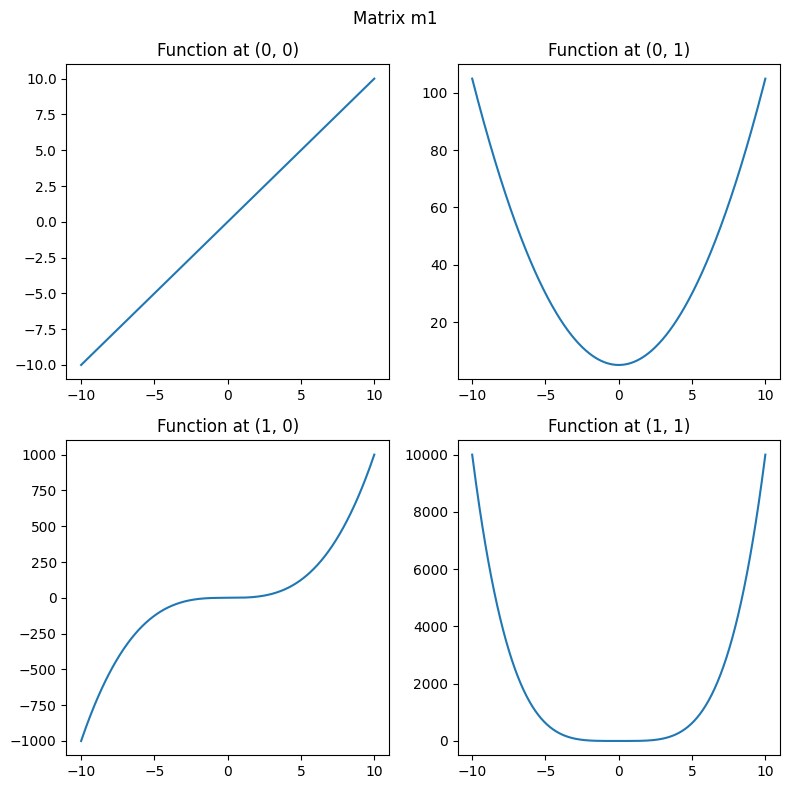

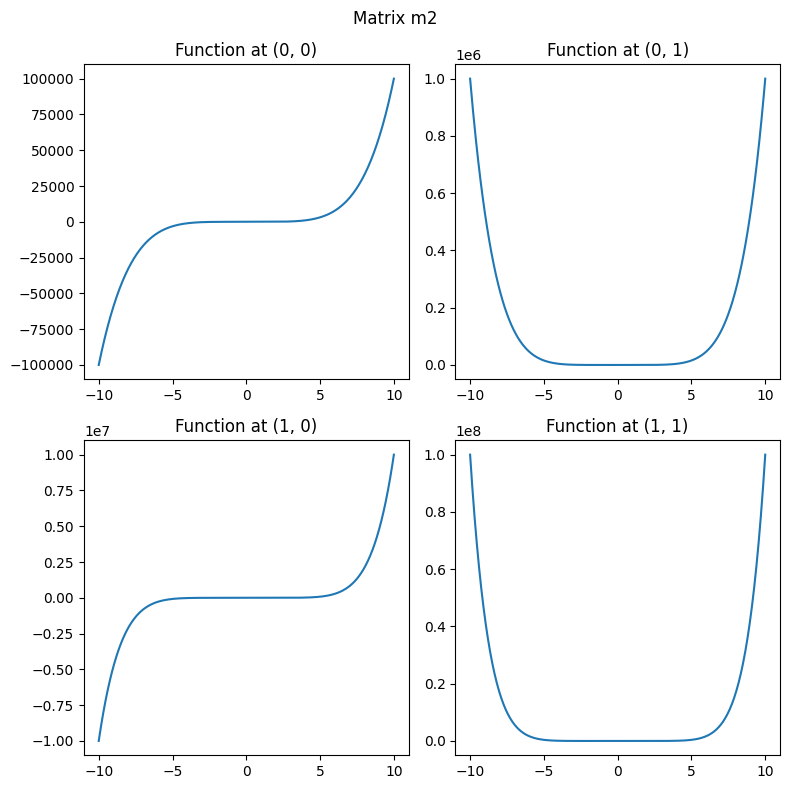

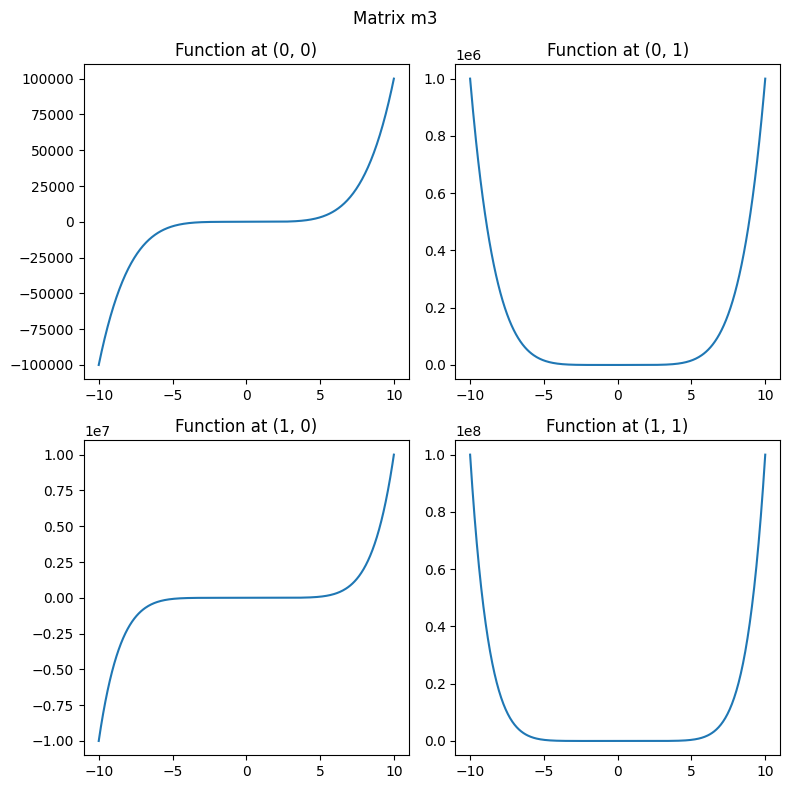

In [3]:
m1 = np.array([[lambda x: x, lambda x: x**2 +5 ], [lambda x: x**3, lambda x: x**4]])
m2 = np.array([[lambda x: x**5 + 4, lambda x: x**6], [lambda x: x**7 -7, lambda x: x**8]])

m3 = point_wise_operation(m1, m2, add_functions)
print(m3)

plot_matrix(m1, x_values, title="Matrix m1")
plot_matrix(m2, x_values, title="Matrix m2")
plot_matrix(m3, x_values, title="Matrix m3")

[[<function multiply_functions.<locals>.<lambda> at 0x7f2b26319360>
  <function multiply_functions.<locals>.<lambda> at 0x7f2b2631b010>]
 [<function multiply_functions.<locals>.<lambda> at 0x7f2b2631b130>
  <function multiply_functions.<locals>.<lambda> at 0x7f2b2631b0a0>]]


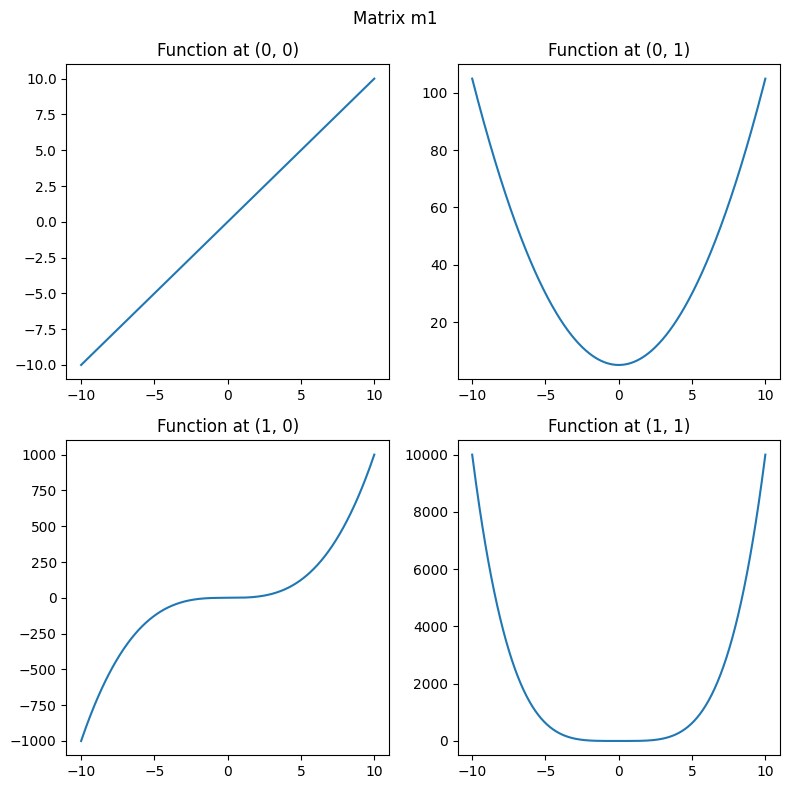

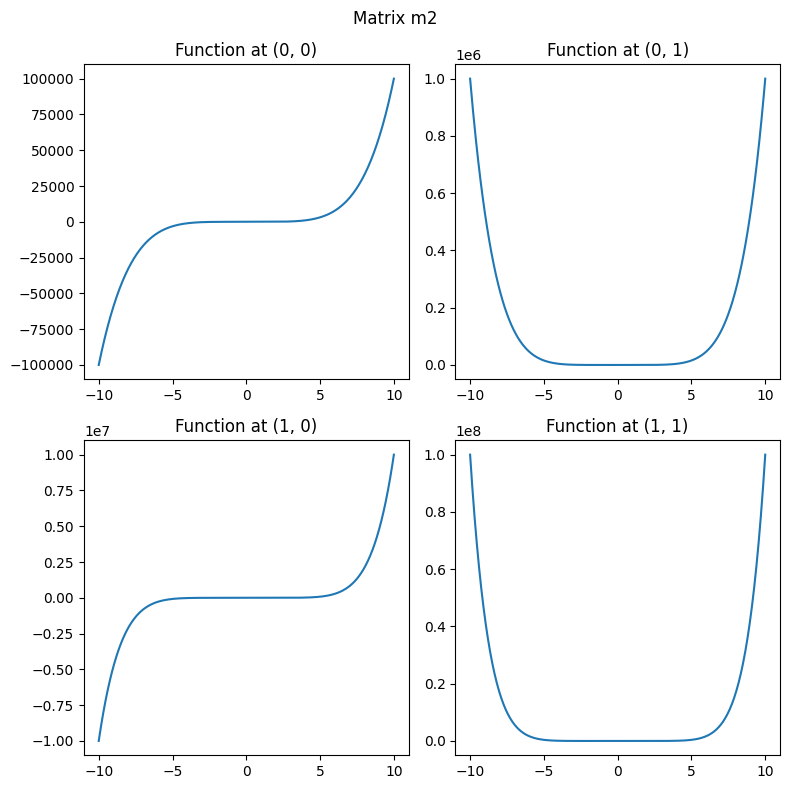

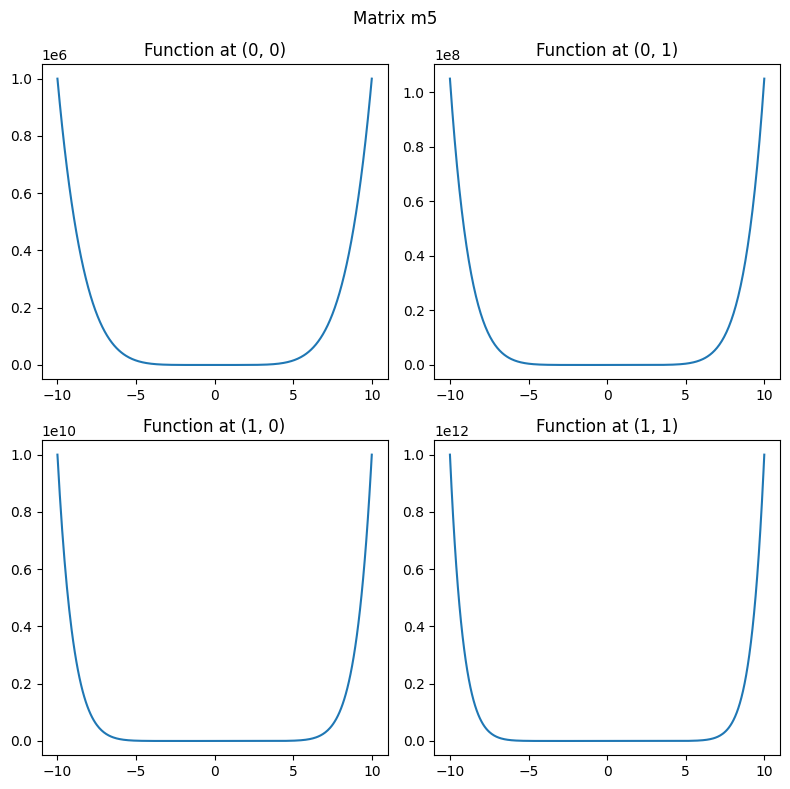

In [4]:
m1 = np.array([[lambda x: x, lambda x: x**2 +5 ], [lambda x: x**3, lambda x: x**4]])
m2 = np.array([[lambda x: x**5 + 4, lambda x: x**6], [lambda x: x**7 -7, lambda x: x**8]])

m5 = point_wise_operation(m1, m2, multiply_functions)
print(m5)

plot_matrix(m1, x_values, title="Matrix m1")
plot_matrix(m2, x_values, title="Matrix m2")
plot_matrix(m5, x_values, title="Matrix m5")

Test part for matrices with differing dimensions:

The shapes of the two matrices you want to operate on, must be equivalent, which they are not.
[[<function add_functions.<locals>.<lambda> at 0x7f2b262d3f40>
  <function add_functions.<locals>.<lambda> at 0x7f2b25e79480>]
 [<function add_functions.<locals>.<lambda> at 0x7f2b25e793f0>
  <function add_functions.<locals>.<lambda> at 0x7f2b25e7b370>]]


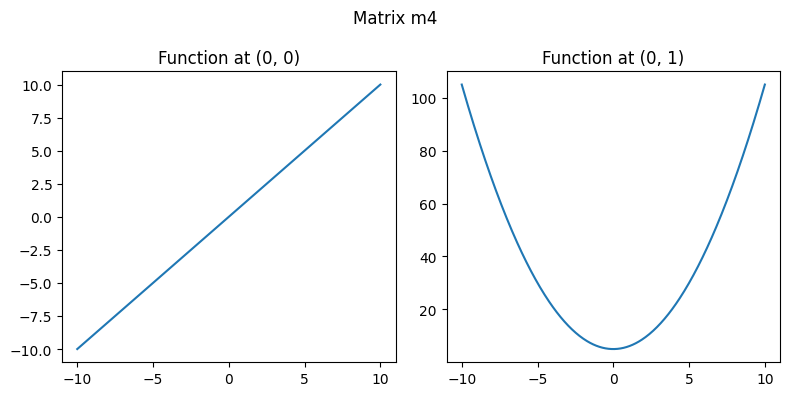

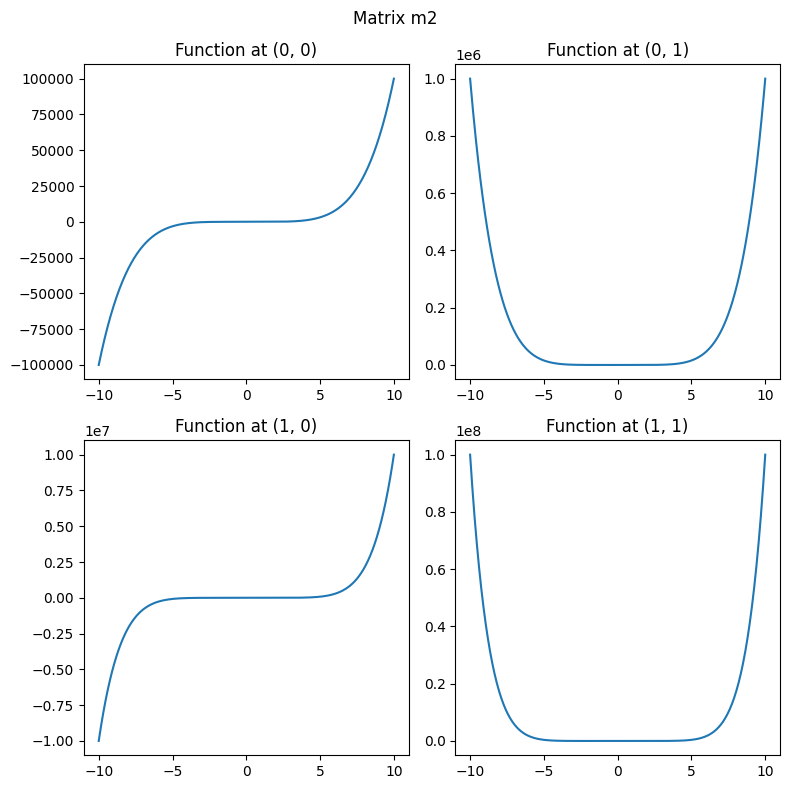

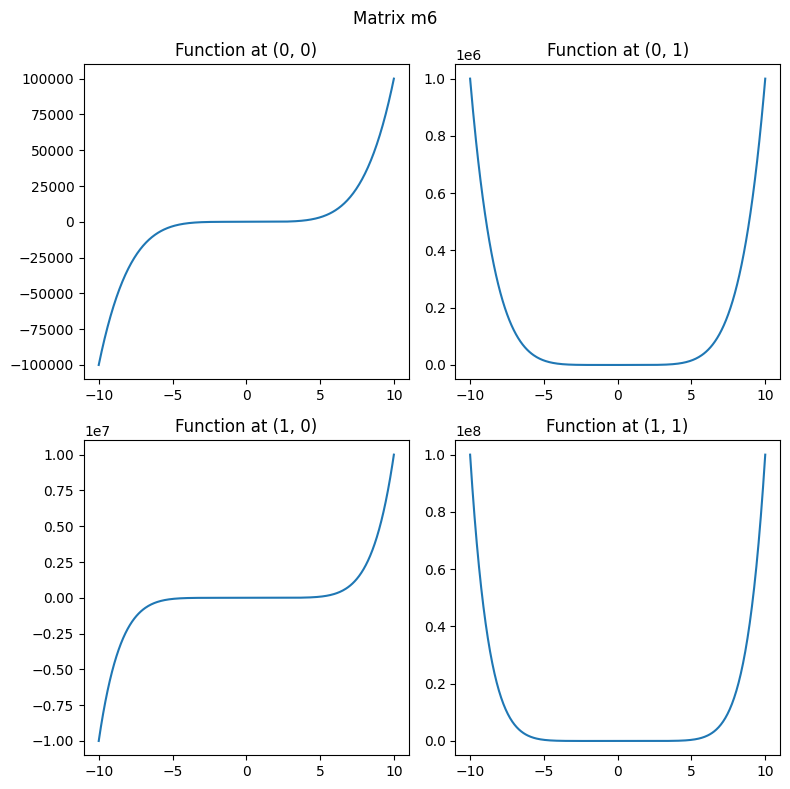

In [5]:
m4 = np.array([[lambda x: x, lambda x: x**2 +5 ]])
m2 = np.array([[lambda x: x**5 + 4, lambda x: x**6], [lambda x: x**7 -7, lambda x: x**8]])

m6 = point_wise_operation(m4, m2, add_functions)
print(m6)

plot_matrix(m4, x_values, title="Matrix m4")
plot_matrix(m2, x_values, title="Matrix m2")
plot_matrix(m6, x_values, title="Matrix m6")

The shapes of the two matrices you want to operate on, must be equivalent, which they are not.
[[<function multiply_functions.<locals>.<lambda> at 0x7f2b25d73130>
  <function multiply_functions.<locals>.<lambda> at 0x7f2b2a0a39a0>
  <function multiply_functions.<locals>.<lambda> at 0x7f2b2a326e60>]
 [<function multiply_functions.<locals>.<lambda> at 0x7f2b2a327d00>
  <function multiply_functions.<locals>.<lambda> at 0x7f2b2a327eb0>
  <function multiply_functions.<locals>.<lambda> at 0x7f2b2a327910>]]


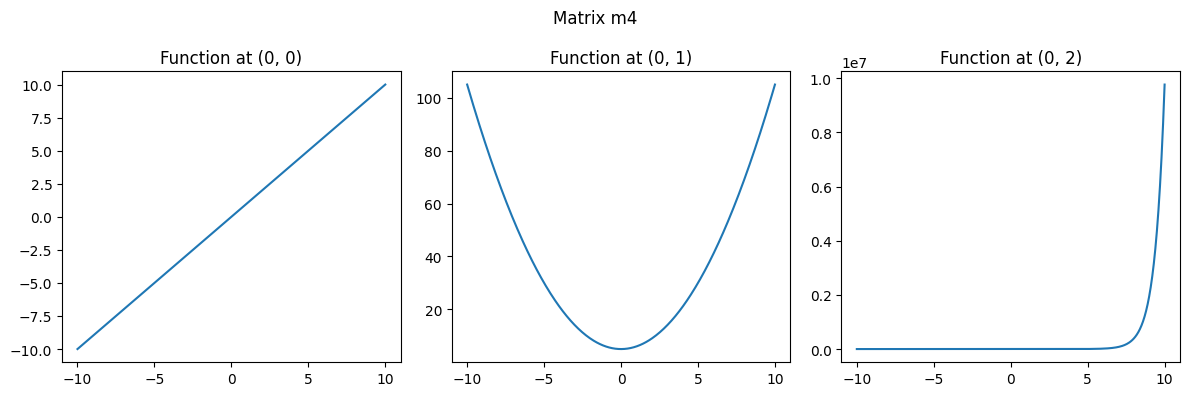

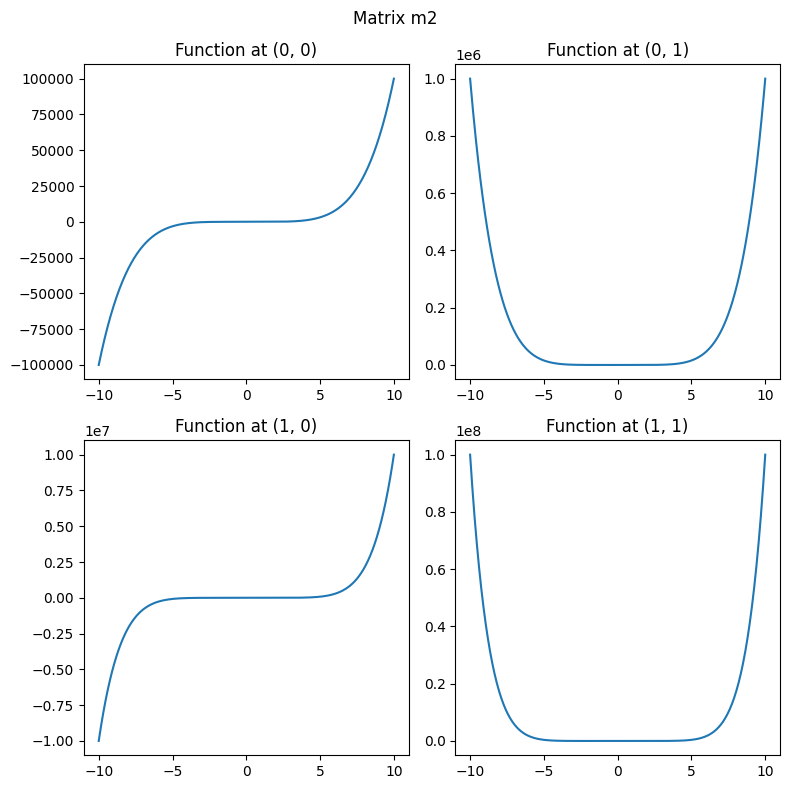

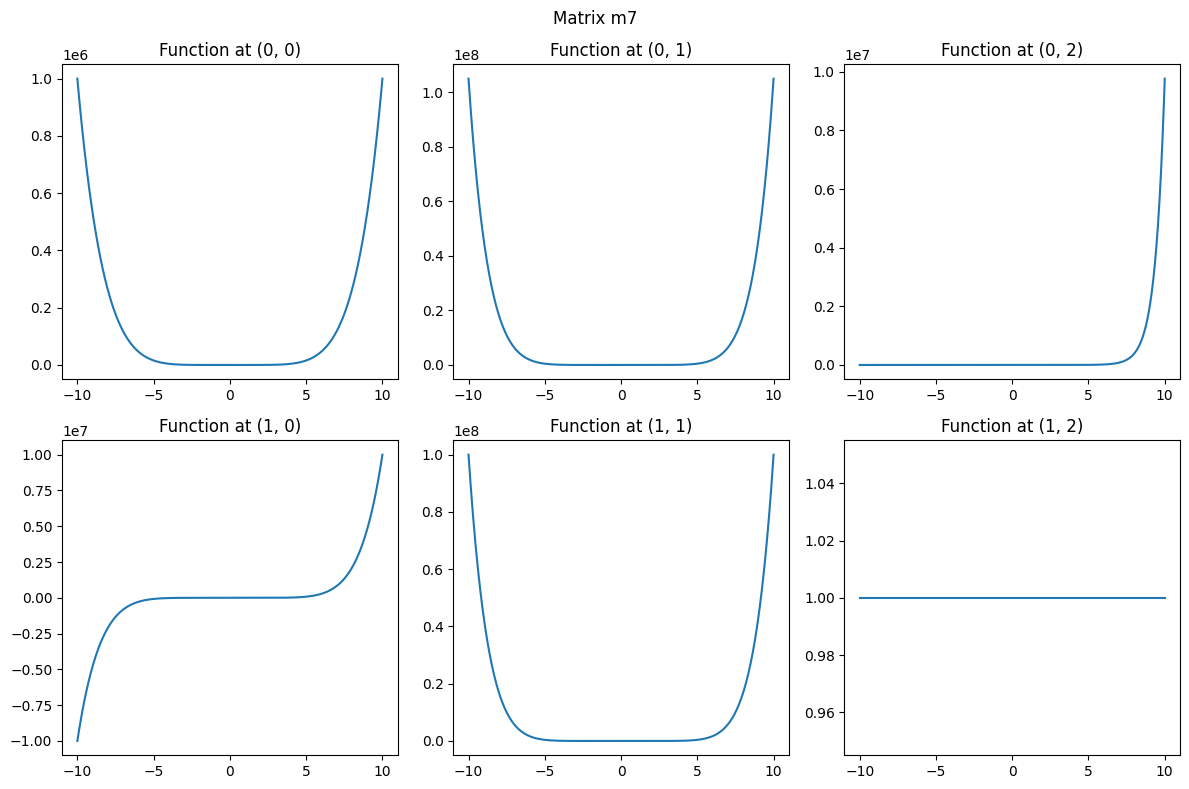

In [6]:
m4 = np.array([[lambda x: x, lambda x: x**2 +5, lambda x: x*3 + 5**x ]])
m2 = np.array([[lambda x: x**5 + 4, lambda x: x**6], [lambda x: x**7 -7, lambda x: x**8]])

m7 = point_wise_operation(m2, m4, multiply_functions)
print(m7)
plot_matrix(m4, x_values, title="Matrix m4")
plot_matrix(m2, x_values, title="Matrix m2")
plot_matrix(m7, x_values, title="Matrix m7")

#### Implementation of function evaluation for such matrices

In [7]:
def evaluate_matrix(in_matrix: np.ndarray, x: float) -> np.ndarray or None:
    
    """This function takes a matrix of functions and a number x and returns a matrix 
        of the evaluation of the functions in the input matrix at x. In case the point_wise_operation
        did not return a matrix due to dimensions that don't match, evaluation won't be possible"""

    output = np.ndarray(shape=(len(in_matrix), len(in_matrix[0])), dtype=object)
    for i in range(len(in_matrix)):
        for j in range(len(in_matrix[0])):
            output[i][j] = in_matrix[i][j](x)
    return output

Test part:

[[38 73]
 [129 272]]


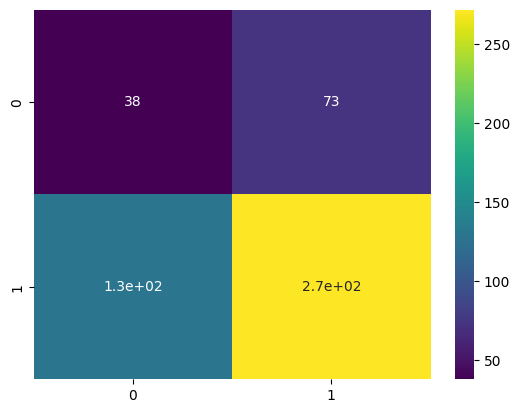

In [8]:
x = 2
print(evaluate_matrix(m3, x))

results = evaluate_matrix(m3, x)
results = results.astype(float)

sns.heatmap(results, annot=True, cmap='viridis')
plt.show()


2D Graph Visualization

[[15645 468750]
 [9764750 244140625]]


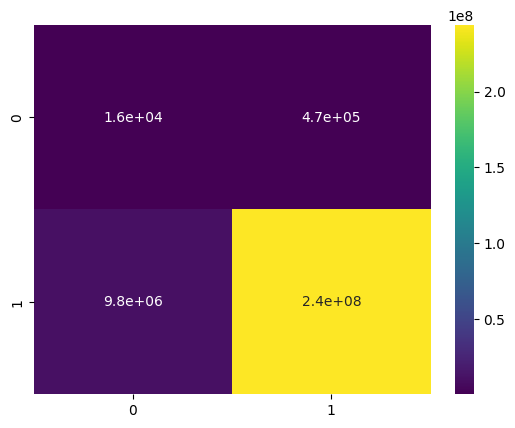

In [9]:
x = 5
print(evaluate_matrix(m5, x))

results = evaluate_matrix(m5, x)
results = results.astype(float)

sns.heatmap(results, annot=True, cmap='viridis')
plt.show()



[[250 743]
 [2180 6561]]


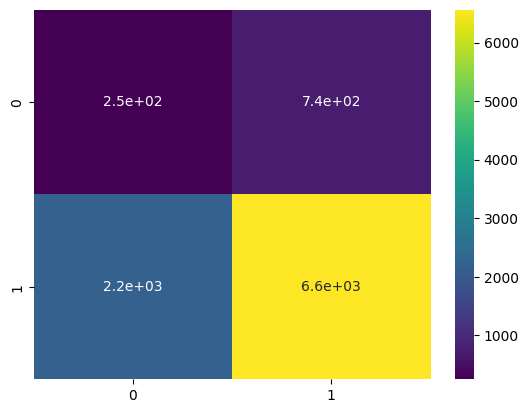

In [10]:
x = 3
print(evaluate_matrix(m6, x))

results = evaluate_matrix(m6, x)
results = results.astype(float)

sns.heatmap(results, annot=True, cmap='viridis')
plt.show()


[[72 576 31]
 [121 256 1]]


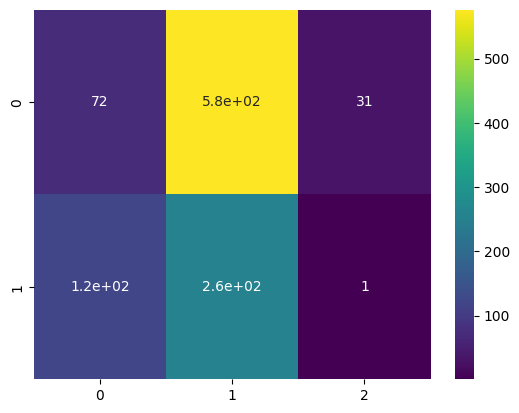

In [11]:
x = 2
print(evaluate_matrix(m7, x))

results = evaluate_matrix(m7, x)
results = results.astype(float)

sns.heatmap(results, annot=True, cmap='viridis')
plt.show()
